In [1]:
import qiskit
from qiskit_aer.backends.aerbackend import AerBackend

In [2]:
from dc_qiskit_qml.encoding_maps import NormedAmplitudeEncoding
from dc_qiskit_qml.distance_based.hadamard import QmlHadamardNeighborClassifier
from dc_qiskit_qml.distance_based.hadamard.state import QmlGenericStateCircuitBuilder
from dc_qiskit_qml.distance_based.hadamard.state.sparsevector import MottonenStatePreparation

initial_state_builder = QmlGenericStateCircuitBuilder(MottonenStatePreparation())
encoding_map = NormedAmplitudeEncoding()

execution_backend: AerBackend = qiskit.Aer.get_backend('qasm_simulator')
qml = QmlHadamardNeighborClassifier(backend=execution_backend,
                                    shots=8192, 
                                    classifier_circuit_factory=initial_state_builder,
                                    encoding_map=encoding_map)

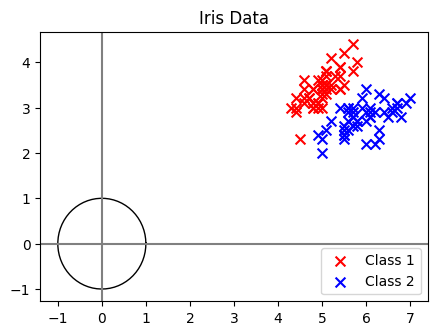

In [5]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X = np.asarray([x[0:2] for x, yy in zip(X, y) if yy != 2])
y = np.asarray([yy for x, yy in zip(X, y) if yy != 2])

figure = plt.figure(figsize=(5,3.5), num=2)
sub1 = figure.subplots(nrows=1, ncols=1)

class_0_data = np.asarray([X[i] for i in range(len(X)) if y[i] == 0])
class_1_data = np.asarray([X[i] for i in range(len(X)) if y[i] == 1])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi + 0.1, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi + 0.1, 0.1)], 
          color='black', linewidth=1)
sub1.set_title("Iris Data")
sub1.legend([class_0, class_1], ["Class 1", "Class 2"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

In [6]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler',  StandardScaler()), 
    ('l2norm', Normalizer(norm='l2', copy=True)),
    ('qml', qml)
])

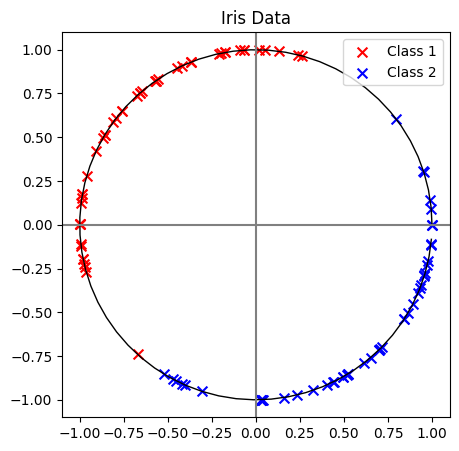

In [7]:
_X = pipeline.fit_transform(X, y)

figure = plt.figure(figsize=(5,5), num=2)
sub1 = figure.subplots(nrows=1, ncols=1)

class_0_data = np.asarray([_X[i] for i in range(len(X)) if y[i] == 0])
class_1_data = np.asarray([_X[i] for i in range(len(X)) if y[i] == 1])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)
sub1.set_title("Iris Data")
sub1.legend([class_0, class_1], ["Class 1", "Class 2"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

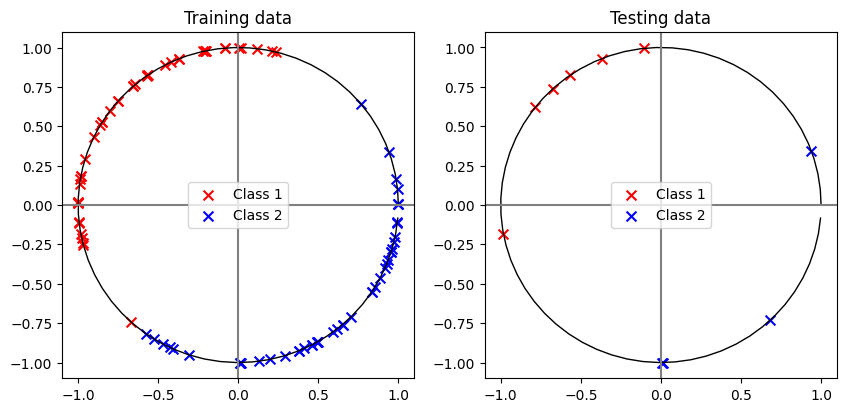

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
_X_train = pipeline.fit_transform(X_train, y_train)
_X_test = pipeline.transform(X_test)

figure = plt.figure(figsize=(10,4.5), num=2)
sub1, sub2 = figure.subplots(nrows=1, ncols=2)

class_0_data = np.asarray([_X_train[i] for i in range(len(X_train)) if y_train[i] == 0])
class_1_data = np.asarray([_X_train[i] for i in range(len(X_train)) if y_train[i] == 1])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)
sub1.set_title("Training data")
sub1.legend([class_0, class_1], ["Class 1", "Class 2"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

class_0_data_test = np.asarray([_X_test[i] for i in range(len(X_test)) if y_test[i] == 0])
class_1_data_test = np.asarray([_X_test[i] for i in range(len(X_test)) if y_test[i] == 1])

class_0 = sub2.scatter(class_0_data_test[:,0], class_0_data_test[:,1], color='red', marker='x', s=50)
class_1 = sub2.scatter(class_1_data_test[:,0], class_1_data_test[:,1], color='blue', marker='x', s=50)
sub2.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)
sub2.set_title("Testing data")
sub2.legend([class_0, class_1], ["Class 1", "Class 2"])
sub2.axvline(color='gray')
sub2.axhline(color='gray')

Size of the training data and therefore the needed amount of qubits to encode the index

In [9]:
len(X_train), np.ceil(np.log2(len(X_train)))

(90, 7.0)

## Results

In [10]:
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

In [11]:
list(zip(prediction, y_test))

[(1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0)]

In [12]:
"Test Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction, y_test)])/len(prediction)
)

'Test Accuracy: 1.0'

In [13]:
prediction_train = pipeline.predict(X_train)

In [14]:
"Train Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction_train, y_train)])/len(prediction_train)
)

'Train Accuracy: 0.9222222222222223'

In [15]:
list(zip(prediction_train, y_train))

[(0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (1, 0),
 (1, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1)]

## Comparison to the theoretical Values

In [17]:
for i in range(len(X_test)):
    acc =  QmlHadamardNeighborClassifier.p_acc_theory(X_train, y_train, X_test[i])
    print(f"{qml.last_predict_p_acc[i]:.4f} ~~ {acc:.4f}")

0.4783 ~~ 41.5554
5.5367 ~~ 37.6270
5.4763 ~~ 42.4940
5.5492 ~~ 35.9128
5.5850 ~~ 40.0757
5.4886 ~~ 38.7372
5.5466 ~~ 36.8114
5.5311 ~~ 37.8991
5.4626 ~~ 41.3446
0.4956 ~~ 39.0643


In [18]:
for i in range(len(X_test)):
    label = QmlHadamardNeighborClassifier.p_label_theory(X_train, y_train, X_test[i], prediction[i])
    print(f"{qml.last_predict_probability[i]:.4f} ~~ {label:.4f}")

0.6981 ~~ 0.5329
0.5028 ~~ 0.5345
0.5633 ~~ 0.5312
0.6249 ~~ 0.4683
0.5710 ~~ 0.4711
0.6498 ~~ 0.4697
0.6317 ~~ 0.4707
0.5463 ~~ 0.5341
0.6716 ~~ 0.4706
0.8103 ~~ 0.4701
